In [81]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

DRIVE_PATH = "G:\Mi unidad\Runs"
MODEL = "efficientnetb1multiclass"
BINARY = False
EXECUCIO = 0
#llista_models = [d for d in os.listdir(DRIVE_PATH)]
models = {'alexnetbinary':'Ham10000-AlexnetBinary','resnet152binary':'Ham1000-Resnet152Binary',
          'inceptionv3binary':'Ham10000-Inceptionv3Binary','efficientnetb1binary':'Ham10000-EfficientNetB1Binary',
          'alexnetmulticlass':'Ham10000-AlexnetMulticlass','resnet152multiclass':'Ham10000Resnet152Multiclass',
          'inceptionv3multiclass':'Ham10000Iinceptionv3multiclass','efficientnetb1multiclass':'Ham10000-EfficientNetB1Multiclass'}



directori = DRIVE_PATH+'\\'+models[MODEL]+'\\'+str(EXECUCIO)
json_file_dir  = directori+"\\"+'testing_info.json'


with open(json_file_dir,"r") as file:
    data = json.load(file)

true_classes = np.array([]).astype(int)
predicted_classes = np.array([]).astype(int)

print(data[0])
for object in data:
    if BINARY:
        output = (np.squeeze(np.array(object['output'])) > 0.5).astype(int)
        target = np.squeeze(np.array(object['target']))
    else:
        output = (np.squeeze(np.argmax(np.array(object['output']),axis=1))).astype(int)
        target = np.squeeze(np.array(object['target']))

    true_classes = np.append(true_classes,target)
    predicted_classes = np.append(predicted_classes,output)

print(predicted_classes)
print(true_classes)
cm = confusion_matrix(true_classes,predicted_classes)

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\perej\AppData\Local\Temp\ipykernel_16204\655434351.py:8: SyntaxWarning: invalid escape sequence '\M'
  DRIVE_PATH = "G:\Mi unidad\Runs"


{'output': [[0.2485891580581665, 0.3362492024898529, 0.38454669713974, 0.02686682902276516, 0.001447643036954105, 0.0014060337562114, 0.0008943873108364642], [6.280719389906153e-05, 7.30959145585075e-05, 0.009505869820713997, 0.001353943138383329, 0.9889840483665466, 1.1446419193816837e-05, 8.766069186094683e-06], [0.3468397557735443, 0.629194438457489, 0.020027780905365944, 0.0004962041275575757, 0.001811415539123118, 0.0005083189462311566, 0.0011219829320907593], [0.8755558729171753, 0.07688985019922256, 0.031375933438539505, 0.0014091768534854054, 0.0014373718295246363, 0.0004483332741074264, 0.012883499264717102], [0.036650270223617554, 0.03875432536005974, 0.017193885520100594, 0.008243707939982414, 0.007302482612431049, 0.014904332347214222, 0.8769509196281433], [0.009767503477633, 0.25464972853660583, 0.5398949980735779, 0.18590453267097473, 0.002088884124532342, 0.004518141038715839, 0.0031761950813233852], [0.9944372177124023, 0.001406905590556562, 0.0013101926306262612, 0.000

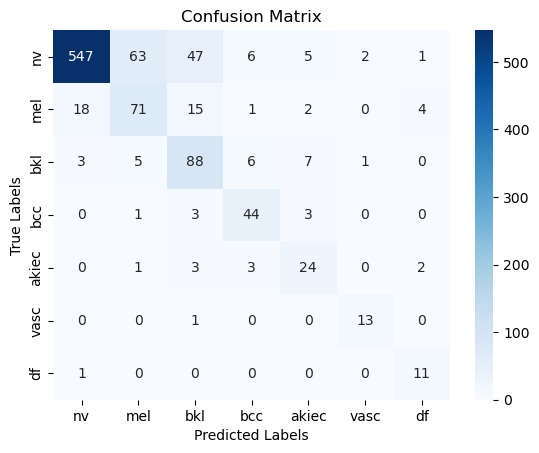

In [82]:
if BINARY:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malign"], yticklabels=["Benign","Malign"])

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["nv","mel","bkl","bcc","akiec","vasc","df"], 
                yticklabels=["nv","mel","bkl","bcc","akiec","vasc","df"])

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [83]:
accuracy = accuracy_score(true_classes,predicted_classes)
precision = precision_score(true_classes,predicted_classes, average=None)  
recall = recall_score(true_classes,predicted_classes, average=None)
f1 = f1_score(true_classes,predicted_classes, average=None)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.7964071856287425
Precision: [0.96133568 0.5035461  0.56050955 0.73333333 0.58536585 0.8125
 0.61111111]
Recall: [0.81520119 0.63963964 0.8        0.8627451  0.72727273 0.92857143
 0.91666667]
F1-Score: [0.88225806 0.56349206 0.65917603 0.79279279 0.64864865 0.86666667
 0.73333333]


In [84]:
unique_classes, counts = np.unique(true_classes, return_counts=True)
print(unique_classes)
print(counts)

[0 1 2 3 4 5 6]
[671 111 110  51  33  14  12]
